<a href="https://colab.research.google.com/github/PilouZer/PilouZer/blob/main/S6_DNN_BasicImageClassification_regularization_and_hyperparameterTuning_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [22]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [24]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [25]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [27]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [28]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

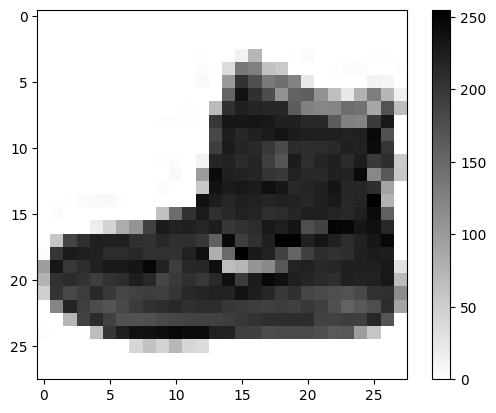

In [29]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [30]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

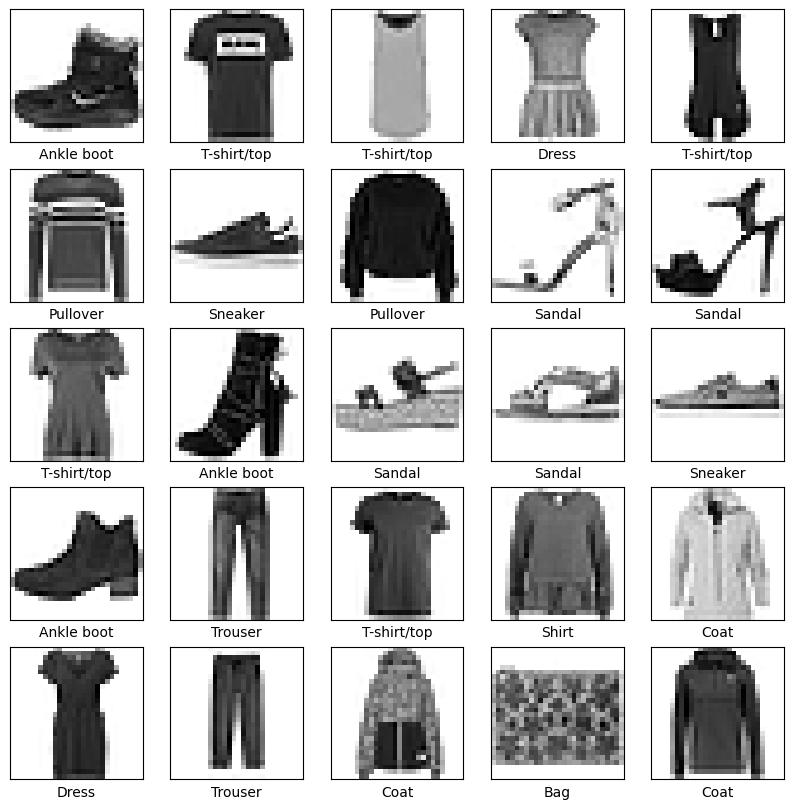

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [32]:
#TODO 1 (2 layers of 64 hidden nodes, and the first one has dropout 0.2)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


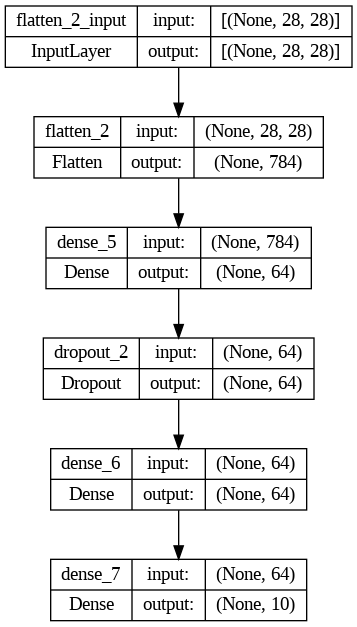

In [34]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [37]:
#TODO 2 -- Use Adam
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics="accuracy")

In [39]:
#TODO 3 -- Callbacks
import datetime
from tensorflow.keras.callbacks import TensorBoard, CSVLogger, EarlyStopping
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir)
csv_logger = CSVLogger("training_logs.txt")
callback = EarlyStopping(monitor="val_loss", patience=3)

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [40]:
model.fit(train_images, train_labels, epochs=10, validation_split = 0.2, 
          callbacks=[callback, tensorboard_callback, csv_logger])

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5938 - accuracy: 0.7879 - val_loss: 0.4244 - val_accuracy: 0.8449
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4331 - accuracy: 0.8426 - val_loss: 0.4049 - val_accuracy: 0.8557
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3972 - accuracy: 0.8530 - val_loss: 0.3835 - val_accuracy: 0.8568
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3762 - accuracy: 0.8611 - val_loss: 0.3584 - val_accuracy: 0.8684
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3636 - accuracy: 0.8673 - val_loss: 0.3497 - val_accuracy: 0.8758
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3503 - accuracy: 0.8694 - val_loss: 0.3503 - val_accuracy: 0.8754
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3389 - accuracy: 0.8744 - val_loss: 0.3473 - val_accuracy:

In [42]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
!pwd

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [43]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

1875/1875 - 4s - loss: 0.2837 - accuracy: 0.8962 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.3626 - accuracy: 0.8748 - 612ms/epoch - 2ms/step

Train accuracy: 0.8962000012397766

Test accuracy: 0.8748000264167786


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Hyperparameter tuning using Keras Tuner


In [44]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


In [45]:
import keras_tuner as kt

In [46]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  for i in range(hp.Int('num_layers', 2, 3)):
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_' + str(i), 
                     min_value=32, max_value=256, step=100), 
                     activation=hp_activation))

  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  
  return model

In [47]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory='dir',
                     project_name='x')

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [49]:
tuner.search(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.721750020980835

Best val_accuracy So Far: 0.8723333477973938
Total elapsed time: 00h 03m 17s

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation
0.0001            |0.001             |learning_rate
3                 |2                 |num_layers
132               |232               |units_0
232               |32                |units_1
32                |32                |units_2
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
 965/1500 [==================>...........] - ETA: 3s - loss: 0.8033 - accuracy: 0.7419

KeyboardInterrupt: ignored

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
import pandas as pd

pd.DataFrame(history.history)

In [ ]:
tuner.results_summary()
